In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [4]:
train.dropna(axis = 0, subset = ['target'], inplace = True)
y = train.target
X = train.drop(['target'], axis = 1).select_dtypes(exclude = ['object'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [6]:
lr = LogisticRegression()

In [7]:
lr.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = lr.predict(X_test)
print('Accuracy of logistic regression:{:}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression:0.9632013033295999


In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
print('Confusion Matrix:\n', confusion_matrix)

Confusion Matrix:
 [[189192      0]
 [  7228      0]]


In [12]:
from sklearn.metrics import classification_report

In [13]:
print(classification_report(y_true = y_test, y_pred = y_pred))

C:\Users\Gauri\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    189192
           1       0.00      0.00      0.00      7228

    accuracy                           0.96    196420
   macro avg       0.48      0.50      0.49    196420
weighted avg       0.93      0.96      0.95    196420



C:\Users\Gauri\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gauri\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

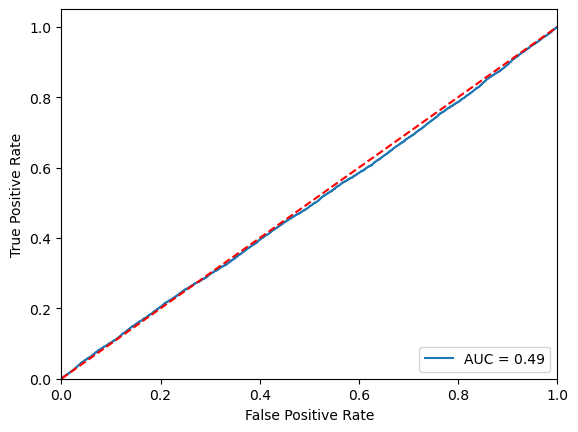

In [20]:
log_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % auc(fpr, tpr))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [21]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resample, y_resample = rus.fit_resample(X,y)
len(X_resample)

43388

In [22]:
from collections import Counter
print(sorted(Counter(y_resample).items()))

[(0, 21694), (1, 21694)]


In [23]:
X_train, X_test, y_train, y_test= train_test_split(X_resample, y_resample, test_size=0.33)

In [24]:
lr1=LogisticRegression()
lr1.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred1 = lr1.predict(X_test)
print('Accuracy of logistic regression:{:}'.format(lr1.score(X_test, y_test)))

Accuracy of logistic regression:0.5002444304769886


In [26]:
#performance metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred1)
print('Confusion matrix:\n', confusion_matrix)

Confusion matrix:
 [[   0 7156]
 [   0 7163]]


In [27]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import f1_score

print('Precision score:', precision_score(y_pred1, y_test))
print('Recall score:', recall_score(y_pred1, y_test))
print('G-mean score:', geometric_mean_score(y_pred1, y_test))
print('F1 score:', f1_score(y_pred1, y_test))

Precision score: 1.0
Recall score: 0.5002444304769886
G-mean score: 0.0
F1 score: 0.6668839028023462


C:\Users\Gauri\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


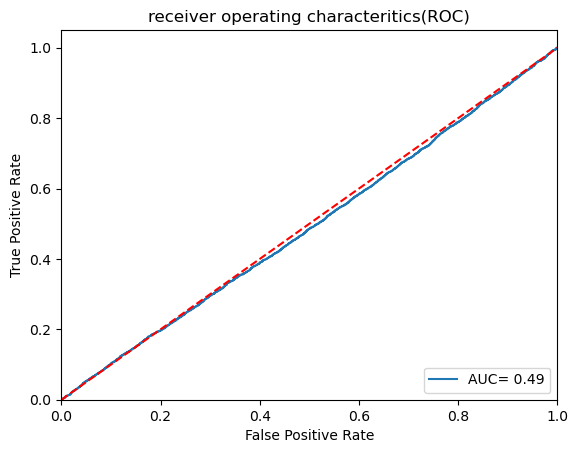

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

log_roc_auc= roc_auc_score(y_test, y_pred1)
fpr, tpr, thresholds = roc_curve(y_test, lr1.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='AUC= %0.2f' % auc(fpr, tpr))
plt.plot([0, 1],[0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('receiver operating characteritics(ROC)')
plt.legend(loc="lower right")
plt.show()

In [29]:
from imblearn.under_sampling import TomekLinks
tl=TomekLinks(sampling_strategy='majority')
X_resample_tl, y_resample_tl = tl.fit_resample(X, y)
len(X_resample_tl)

583127